In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('dataset1.csv')
print(df.shape)

(125, 2)


In [ ]:
df.head(10)

,x1,y
0,5.065204,52.298583
1,21.099720,94.845222
2,18.118661,82.565705
3,22.489969,96.253496
4,16.132536,82.691912
5,12.886002,70.326939
6,23.126878,98.773088
7,14.508811,79.151367
8,3.370063,47.511661
9,22.725175,95.548355


In [ ]:
X = df[['x1']].values
print(X.shape) # (n_samples, n_features)

y = df['y'].values
print(y.shape) # (n_samples,)

(125, 1)
(125,)


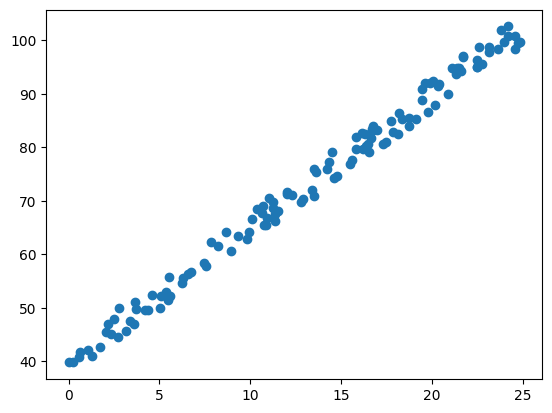

In [ ]:
plt.scatter(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (100, 1)
X_test shape: (25, 1)


(0.0035360372520026,
 24.811594662250304,
 39.810765693609305,
 102.55227528874244)

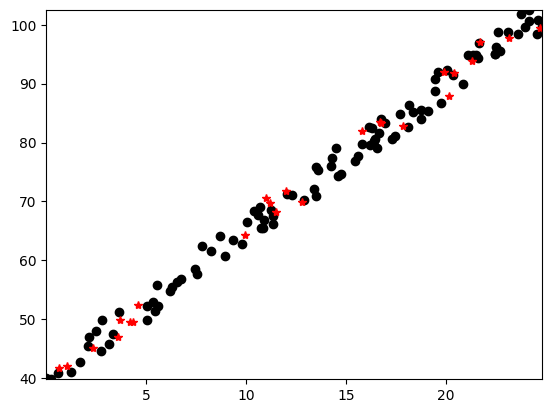

In [ ]:
plt.plot(X_train, y_train, "ko")
plt.plot(X_test, y_test, 'r*')

plt.axis([min(X), max(X), min(y), max(y)])

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)


theta0 = model.intercept_  ## c_hat
theta1 = model.coef_        ##  m_hat
print(theta0)
print(theta1)

39.77426256816559
[2.50839942]


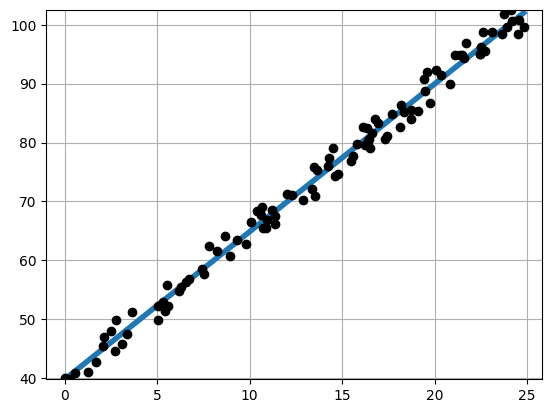

In [ ]:
xx = np.linspace(min(X), max(X), 100)
yy = theta0 + theta1*xx
plt.plot(xx, yy, lw=4)
plt.plot(X_train, y_train, 'ko')
plt.grid('on')
plt.axis([min(X)-1, max(X)+1, min(y), max(y)])
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)

y_predicted = model.predict(X_test)
mse_test = np.mean((y_test - y_predicted)**2)
print("Testing loss:", mse_test)

Training loss: 2.920380501421686
Testing loss: 2.7441467912573807


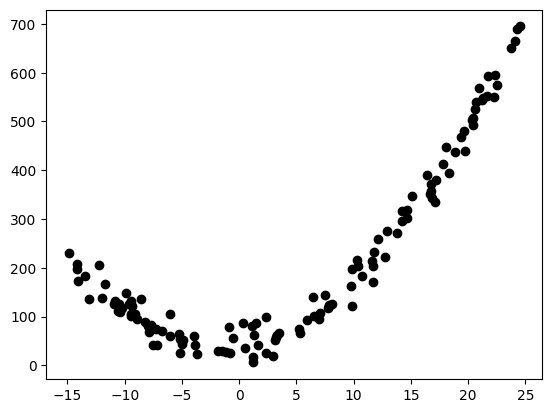

In [ ]:
df = pd.read_csv("dataset2.csv")
X = df[['x1']].values
y = df['y'].values

plt.plot(X, y, 'ko')

In [ ]:
df.head(10)

,x1,y
0,1.664024,41.629006
1,6.490199,140.001995
2,-0.573959,55.607427
3,17.067061,333.886450
4,-10.525473,126.569757
5,-8.614420,136.537338
6,10.424374,203.935237
7,-6.019101,105.499797
8,2.348661,25.615589
9,3.512050,65.604967


In [ ]:
df['x1^2'] = df['x1']**2
df.head()

,x1,y,x1^2
0,1.664024,41.629006,2.768977
1,6.490199,140.001995,42.122680
2,-0.573959,55.607427,0.329429
3,17.067061,333.886450,291.284576
4,-10.525473,126.569757,110.785586


In [ ]:
X = df[['x1', 'x1^2']].values
y = df['y'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (125, 2)
Shape of y: (125,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

45.428715303046914
[2.72113602 0.97571538]


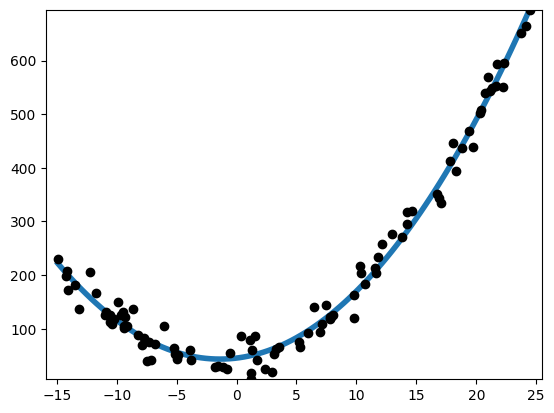

In [ ]:
xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
yy = theta0 + theta1[0]*xx + theta1[1]*(xx**2)
plt.plot(xx, yy, lw=4)
plt.plot(X_train[:,0], y_train, 'ko')
plt.axis([np.min(X[:,0])-1, np.max(X[:,0])+1, min(y), max(y)])
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)
mse_test = np.mean((y_test - y_predicted)**2)
print("Testing loss:", mse_test)

Training loss: 489.71460498433066
Testing loss: 71508.49907971073


# A Real dataset

In [ ]:
# from sklearn.datasets import load_boston
# data = load_boston()
# # data = datasets.load_boston()
# data.keys()

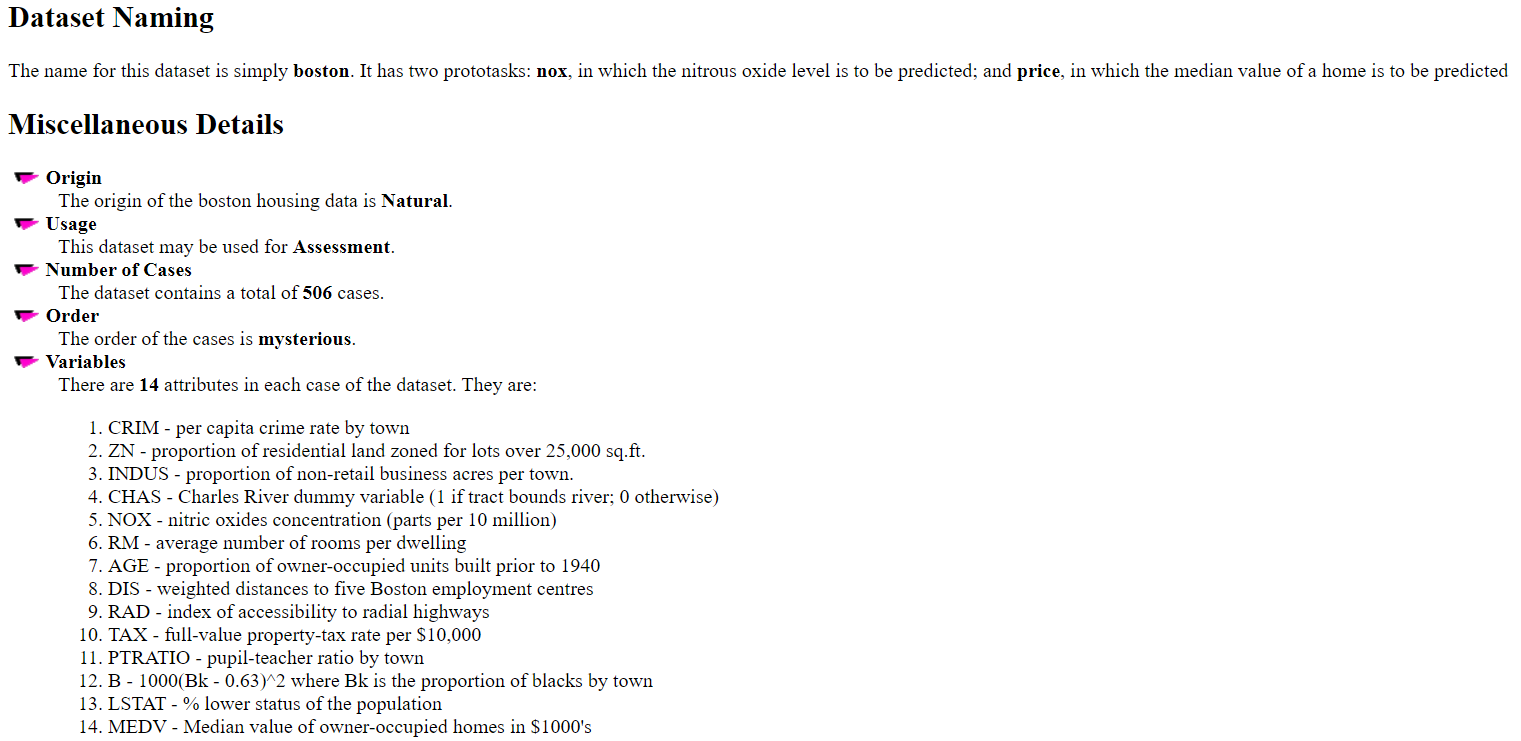

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# raw_df = raw_df.iloc[::2]

In [ ]:
# X = data['data']
# y = data['target']
X = data
y = target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
X[0,:], y[0,]

(array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]),
 24.0)

In [ ]:
# print(data['feature_names'])

In [ ]:
# print(data['DESCR'])

In [ ]:
for i in range(X.shape[-1]):
  print(min(X[:,i]),'---',max(X[:,i]))

0.00632 --- 88.9762
0.0 --- 100.0
0.46 --- 27.74
0.0 --- 1.0
0.385 --- 0.871
3.561 --- 8.78
2.9 --- 100.0
1.1296 --- 12.1265
1.0 --- 24.0
187.0 --- 711.0
12.6 --- 22.0
0.32 --- 396.9
1.73 --- 37.97


In [ ]:
# df = pd.DataFrame(data['data'], columns=data['feature_names'])
# df.head()

In [ ]:
X_norm = preprocessing.minmax_scale(X)

In [ ]:
for i in range(X.shape[-1]):
  print(min(X_norm[:,i]),'---',max(X_norm[:,i]))

0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 0.9999999999999999
0.0 --- 0.9999999999999999
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 0.9999999999999999
0.0 --- 0.9999999999999998


In [ ]:
X = X_norm
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print("Testing loss:", mse_test)

Training loss: 21.649376911833603
Testing loss: 23.616994100563623


In [ ]:
theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

26.995592096303866
[ -7.25012431   4.80407782  -0.14926259   3.06260576  -7.8425244
  19.16652006  -0.82683103 -16.68678994   6.60723316  -6.35127813
  -8.68711112   3.78123489 -17.60885468]


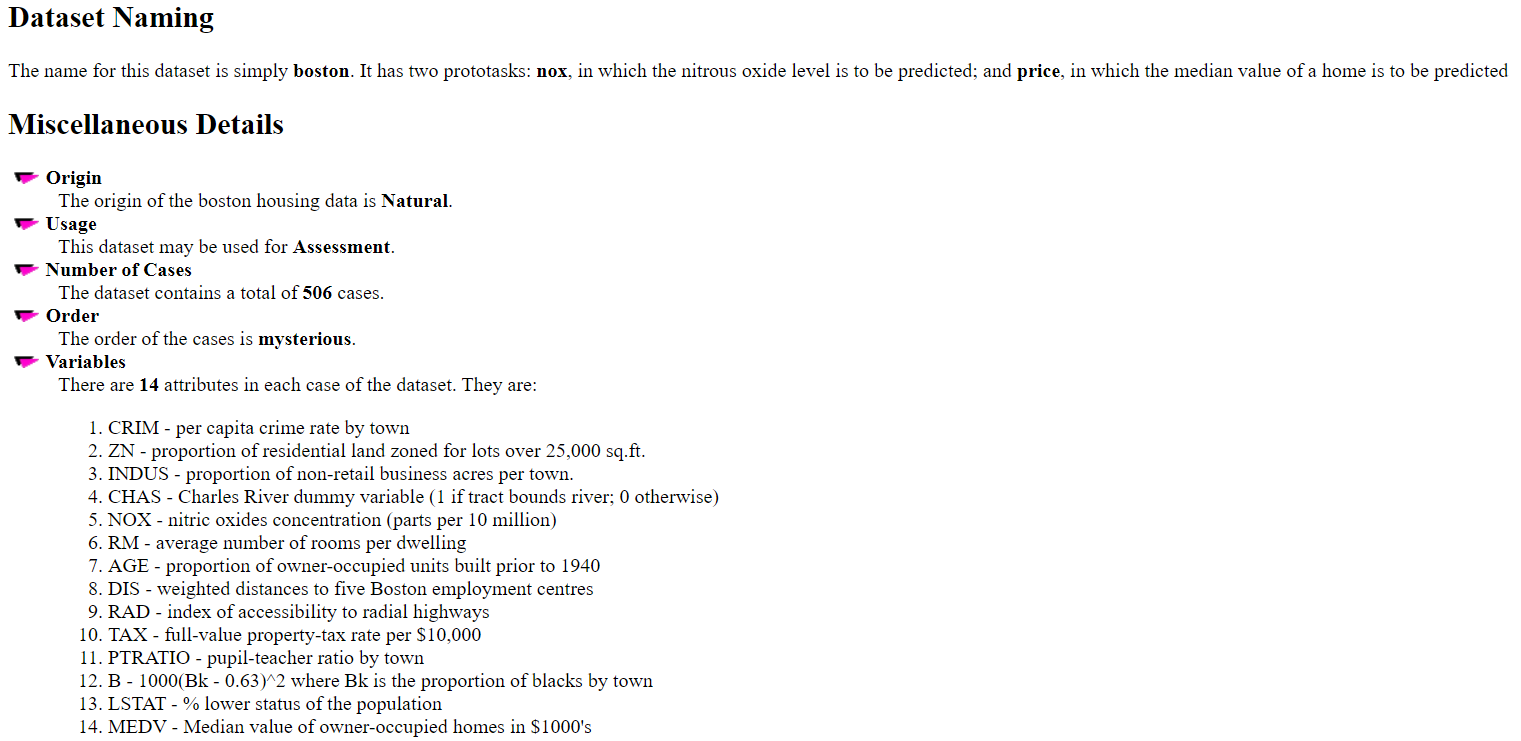